In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import pandas_ta as ta
import matplotlib.pyplot as plt
import warnings
plt.style.use("seaborn-v0_8")
warnings.filterwarnings('ignore')

In [81]:
tickers=pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]
tickers= tickers.Symbol.to_list()
tickers= [i.replace('.','-') for i in tickers]
tickers.pop(474)
tickers.pop(489)
tickers

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADM',
 'ADBE',
 'ADP',
 'AES',
 'AFL',
 'A',
 'ABNB',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BG',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',


In [49]:
period = 10
stocks=yf.download("AAPL",start = "2010-01-01")
df=stocks[["Close"]]
df['MA200'] = ta.sma(df['Close'], length=200)
df['RSI'] = df.ta.rsi(length=period)
df= df.dropna()
df

[*********************100%%**********************]  1 of 1 completed


,Close,MA200,RSI
Date,,,
2010-10-18,11.357143,8.767198,87.344265
2010-10-19,11.053214,8.784248,69.349367
2010-10-20,11.090357,8.801418,70.183491
2010-10-21,11.054286,8.819016,68.181342
2010-10-22,10.981071,8.836318,64.059926
...,...,...,...
2023-11-13,184.800003,172.725300,68.708398
2023-11-14,187.440002,172.947500,72.872625
2023-11-15,188.009995,173.166100,73.711870


In [54]:
df["Buy"]=np.where((df["Close"].shift()>df["MA200"].shift()) & (df["RSI"].shift()<30) ,1,0)
df["Sell"] = 0
for i in range(len(df)):
    if df.Buy.iloc[i]:
        for j in range(1,11):
            if (df['RSI'].shift().iloc[i+j]>40):
                df["Sell"].iloc[i+j]=1
                break
            elif j==10:
                df["Sell"].iloc[i+j+1]=1
                
df

,Close,MA200,RSI,Buy,Sell
Date,,,,,
2010-10-18,11.357143,8.767198,87.344265,0,0
2010-10-19,11.053214,8.784248,69.349367,0,0
2010-10-20,11.090357,8.801418,70.183491,0,0
2010-10-21,11.054286,8.819016,68.181342,0,0
2010-10-22,10.981071,8.836318,64.059926,0,0
...,...,...,...,...,...
2023-11-13,184.800003,172.725300,68.708398,0,0
2023-11-14,187.440002,172.947500,72.872625,0,0
2023-11-15,188.009995,173.166100,73.711870,0,0


In [55]:
Buy_dates=df[df['Buy'] == 1].index.tolist()
Sell_dates=df[df['Sell'] == 1].index.tolist()

In [56]:
Buy_dates=[]
Sell_dates=[]
buys=[]
sells=[]
open_pos=False

for i in range(len(df)):
    if df.Buy.iloc[i]:
        if open_pos==False:
            buys.append(i)
            open_pos=True
            Buy_dates.append(df.iloc[i].name)
    elif df.Sell.iloc[i]:
        if open_pos:
            sells.append(i)
            open_pos=False
            Sell_dates.append(df.iloc[i].name)

if len(buys)>len(sells):
    buys.pop(-1)
    Buy_dates.pop(-1)

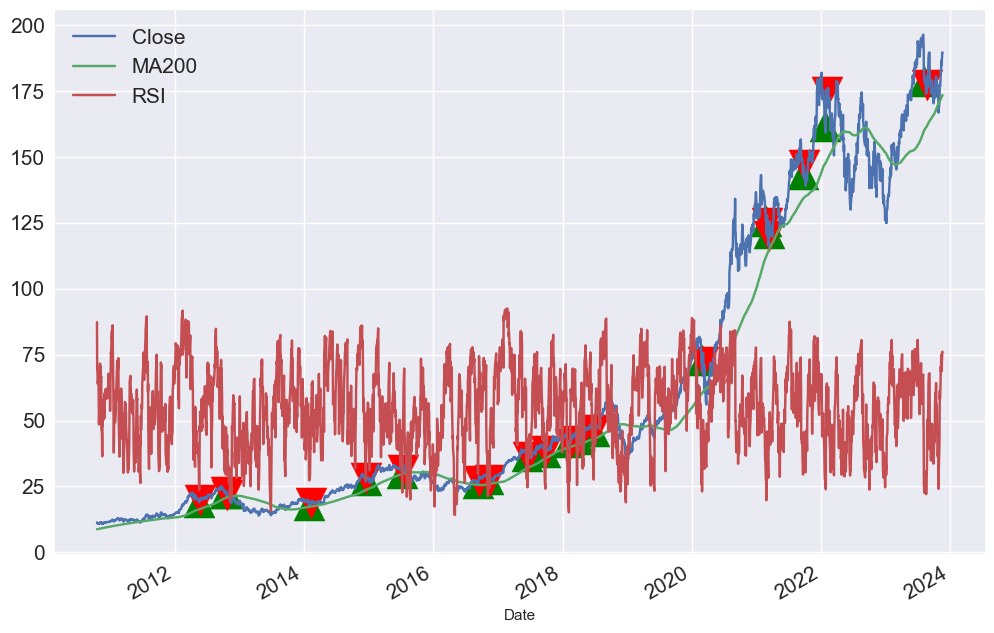

In [57]:
df[["Close","MA200","RSI"]].plot(figsize=(12,8),fontsize=15)
plt.scatter(df.loc[Buy_dates].index, df.loc[Buy_dates]['Close'], marker="^", color='g', s=500)
plt.scatter(df.loc[Sell_dates].index, df.loc[Sell_dates]['Close'], marker="v", color='r', s=500)
plt.legend(loc="upper left", fontsize=15)
plt.show()

In [73]:
def test_strategy(stock,period,invest):
    data=yf.download(stock,start = "2010-01-01")
    df=data.Close.to_frame()

    df['MA200'] = ta.sma(df['Close'], length=200)
    df['RSI'] = df.ta.rsi(length=period)
    df= df.dropna()

    df["Buy"]=np.where((df["Close"].shift()>df["MA200"].shift()) & (df["RSI"].shift()<30) ,1,0)
    df["Sell"] = 0
    for i in range(len(df)):
        if df.Buy.iloc[i]:
            for j in range(1,11):
                if (df['RSI'].iloc[i+j]>40):
                    df["Sell"].iloc[i+j+1]=1
                    break
                elif j==10:
                    df["Sell"].iloc[i+j+1]=1
                
    Buy_dates=[]
    Sell_dates=[]
    buys=[]
    sells=[]
    open_pos=False

    for i in range(len(df)):
        if df.Buy.iloc[i]:
            if open_pos==False:
                buys.append(i)
                open_pos=True
                Buy_dates.append(df.iloc[i].name)
        elif df.Sell.iloc[i]:
            if open_pos:
                sells.append(i)
                open_pos=False
                Sell_dates.append(df.iloc[i].name)

    if len(buys)>len(sells):
        buys.pop(-1)
        Buy_dates.pop(-1)
    
    
    check=pd.DataFrame({'buydate':Buy_dates,'selldate':Sell_dates,'buyprice':df.loc[Buy_dates].Close.values,'sellprice':df.loc[Sell_dates].Close.values})
    check["pnl_perc"]=(check.sellprice-check.buyprice)/check.buyprice
    check["cumm+pnl_perc"]=(check["pnl_perc"]+1).cumprod()
    
    profits_perc=(df.loc[check.selldate].Close.values-df.loc[check.buydate].Close.values)/df.loc[check.buydate].Close.values
    list_profits=(profits_perc+1).cumprod()
    net_returns_perc=(list_profits[-1]-1).round(3)*100
    
    inv_ret=invest*(profits_perc+1).cumprod()
    return_inv=inv_ret[-1]
    
    large_loss=profits_perc.min().round(3)*100
    large_profit=profits_perc.max().round(3)*100
    win_rate = ((profits_perc > 0).sum() / len(profits_perc) * 100).round(3)

    
    return print("Returns perc= {}%".format(net_returns_perc)), print("Invested return= {}".format(return_inv)), print("Largest Loss= {}%".format(large_loss)), print("Largest Profit= {}%".format(large_profit)), print("Winrate= {}%".format(win_rate)) 

In [75]:
test_strategy("AAPl", 10,1000)

[*********************100%%**********************]  1 of 1 completed
Returns perc= 10.2%
Invested return= 1102.0234501707973
Largest Loss= -15.2%
Largest Profit= 8.1%
Winrate= 52.632%


(None, None, None, None, None)

In [83]:
for stock in tickers[:30]:
    print(stock)
    test_strategy(stock, 10,1000)

MMM
[*********************100%%**********************]  1 of 1 completed
Returns perc= 9.5%
Invested return= 1095.401602953521
Largest Loss= -2.1%
Largest Profit= 3.2%
Winrate= 73.333%
AOS
[*********************100%%**********************]  1 of 1 completed
Returns perc= -2.1%
Invested return= 979.0761723303549
Largest Loss= -10.8%
Largest Profit= 6.0%
Winrate= 55.556%
ABT
[*********************100%%**********************]  1 of 1 completed
Returns perc= -5.7%
Invested return= 942.8458772494206
Largest Loss= -6.6000000000000005%
Largest Profit= 5.3%
Winrate= 42.105%
ABBV
[*********************100%%**********************]  1 of 1 completed
Returns perc= 2.3%
Invested return= 1023.0258974755419
Largest Loss= -6.6000000000000005%
Largest Profit= 7.199999999999999%
Winrate= 63.636%
ACN
[*********************100%%**********************]  1 of 1 completed
Returns perc= 5.4%
Invested return= 1053.7802691207771
Largest Loss= -22.0%
Largest Profit= 5.3%
Winrate= 76.19%
ADM
[********************